# Advanced Machine Learning: Regression Modeling with Feature Engineering and Regularization

The idea of this tutorial is to look at the power of feature engineering building on from what we learnt in Module 04 and trying extensive feature engineering and coupling linear regression modeling with the power of regularization which we covered in Module 05

Inspiration for this has been from secrets to win kaggle challenges based on a very [popular kernel](https://www.kaggle.com/juliencs/a-study-on-regression-applied-to-the-ames-dataset)

Simple linear regression is an approach for predicting a **continuous response** using a **single feature**. It takes the following form:

$y = \beta_0 + \beta_1x$

- $y$ is the response
- $x$ is the feature
- $\beta_0$ is the intercept
- $\beta_1$ is the coefficient for x

$\beta_0$ and $\beta_1$ are called the **model coefficients**:

- We must "learn" the values of these coefficients to create our model.
- And once we've learned these coefficients, we can use the model to predict Sales.

### Estimating ("learning") model coefficients

- Coefficients are estimated during the model fitting process using the **least squares criterion**.
- We are find the line (mathematically) which minimizes the **sum of squared residuals** (or "sum of squared errors").

![Estimating coefficients](https://raw.githubusercontent.com/dipanjanS/appliedml_workshop_dhs_av_2019/master/Module%2004%20-%20Supervised%20ML%20-%20Regression/assets/estimating_coefficients.png)

In this diagram:

- The black dots are the **observed values** of x and y.
- The blue line is our **least squares line**.
- The red lines are the **residuals**, which are the distances between the observed values and the least squares line.

![Slope-intercept](https://raw.githubusercontent.com/dipanjanS/appliedml_workshop_dhs_av_2019/master/Module%2004%20-%20Supervised%20ML%20-%20Regression/assets/slope_intercept.png)

How do the model coefficients relate to the least squares line?

- $\beta_0$ is the **intercept** (the value of $y$ when $x$=0)
- $\beta_1$ is the **slope** (the change in $y$ divided by change in $x$)

---

## Dataset

We will be working with a data set based on [housing prices in Ames, Iowa](https://www.kaggle.com/c/house-prices-advanced-regression-techniques). It was compiled for educational use to be a modernized and expanded alternative to the well-known Boston Housing dataset. This version of the data set has had some missing values filled for convenience.

There are an extensive number of features, so they've been described in the table below.

### Predictor

* SalePrice: The property's sale price in dollars. 

### Features

<table>
  <tbody>    
    <tr valign="top">
      <td valign="top">
        <ul>
          <li>MoSold: Month Sold</li>
          <li>YrSold: Year Sold</li><br>
          <li>SaleType: Type of sale</li>
          <li>SaleCondition: Condition of sale</li><br>
          <li>MSSubClass: The building class</li>
          <li>MSZoning: The general zoning classification</li><br>
          <li>Neighborhood: Physical locations within Ames city limits</li>
          <li>Street: Type of road access</li>
          <li>Alley: Type of alley access</li><br>
          <li>LotArea: Lot size in square feet</li>
          <li>LotConfig: Lot configuration</li>
          <li>LotFrontage: Linear feet of street connected to property</li>
          <li>LotShape: General shape of property</li><br>
          <li>LandSlope: Slope of property</li>
          <li>LandContour: Flatness of the property</li><br>
          <li>YearBuilt: Original construction date</li>
          <li>YearRemodAdd: Remodel date</li>
          <li>OverallQual: Overall material and finish quality</li>
          <li>OverallCond: Overall condition rating</li><br>
          <li>Utilities: Type of utilities available</li>
          <li>Foundation: Type of foundation</li>
          <li>Functional: Home functionality rating</li><br>
          <li>BldgType: Type of dwelling</li>
          <li>HouseStyle: Style of dwelling</li><br>
          <li>1stFlrSF: First Floor square feet</li>
          <li>2ndFlrSF: Second floor square feet</li>
          <li>LowQualFinSF: Low quality finished square feet (all floors)</li>
          <li>GrLivArea: Above grade (ground) living area square feet</li>
          <li>TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)</li><br>
          <li>Condition1: Proximity to main road or railroad</li>
          <li>Condition2: Proximity to main road or railroad (if a second is present)</li><br>          
          <li>RoofStyle: Type of roof</li>
          <li>RoofMatl: Roof material</li><br>
          <li>ExterQual: Exterior material quality</li>
          <li>ExterCond: Present condition of the material on the exterior</li>
          <li>Exterior1st: Exterior covering on house</li>
          <li>Exterior2nd: Exterior covering on house (if more than one material)</li><br><br>         
        </ul>
      </td>      
      <td valign="top">
        <ul>
          <li>MasVnrType: Masonry veneer type</li>
          <li>MasVnrArea: Masonry veneer area in square feet</li><br>       
          <li>WoodDeckSF: Wood deck area in square feet</li>
          <li>OpenPorchSF: Open porch area in square feet</li>
          <li>EnclosedPorch: Enclosed porch area in square feet</li>
          <li>3SsnPorch: Three season porch area in square feet</li>
          <li>ScreenPorch: Screen porch area in square feet</li><br>
          <li>PoolArea: Pool area in square feet</li>
          <li>PoolQC: Pool quality</li>
          <li>Fence: Fence quality</li>
          <li>PavedDrive: Paved driveway</li><br>
          <li>GarageType: Garage location</li>
          <li>GarageYrBlt: Year garage was built</li>
          <li>GarageFinish: Interior finish of the garage</li>
          <li>GarageCars: Size of garage in car capacity</li>
          <li>GarageArea: Size of garage in square feet</li>
          <li>GarageQual: Garage quality</li>
          <li>GarageCond: Garage condition</li><br>
          <li>Heating: Type of heating</li>
          <li>HeatingQC: Heating quality and condition</li>
          <li>CentralAir: Central air conditioning</li>
          <li>Electrical: Electrical system</li><br>         
          <li>FullBath: Full bathrooms above grade</li>
          <li>HalfBath: Half baths above grade</li><br>          
          <li>BedroomAbvGr: Number of bedrooms above basement level</li><br>          
          <li>KitchenAbvGr: Number of kitchens</li>
          <li>KitchenQual: Kitchen quality</li><br>         
          <li>Fireplaces: Number of fireplaces</li>
          <li>FireplaceQu: Fireplace quality</li><br>          
          <li>MiscFeature: Miscellaneous feature not covered in other categories</li>
          <li>MiscVal: Value of miscellaneous feature</li><br>          
          <li>BsmtQual: Height of the basement</li>
          <li>BsmtCond: General condition of the basement</li>
          <li>BsmtExposure: Walkout or garden level basement walls</li>
          <li>BsmtFinType1: Quality of basement finished area</li>
          <li>BsmtFinSF1: Type 1 finished square feet</li>
          <li>BsmtFinType2: Quality of second finished area (if present)</li>
          <li>BsmtFinSF2: Type 2 finished square feet</li>
          <li>BsmtUnfSF: Unfinished square feet of basement area</li>
          <li>BsmtFullBath: Basement full bathrooms</li>
          <li>BsmtHalfBath: Basement half bathrooms</li>
          <li>TotalBsmtSF: Total square feet of basement area</li>
        </ul>
      </td>
    </tr>
    
  </tbody>
</table>

## Question 1

* Import the data using Pandas and examine the shape. There are 79 feature columns plus the predictor, the sale price (`SalePrice`). 
* There are three different types: integers (`int64`), floats (`float64`), and strings (`object`, categoricals). Examine how many there are of each data type. 

In [1]:
import pandas as pd
import numpy as np

np.set_printoptions(suppress=True)
# Import the data using the file path
train = pd.read_csv('train.csv')
train.shape   

(1460, 81)

In [2]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [0]:
train = train.drop(columns=['Id'])

In [5]:
train.isnull().sum(axis=1).sort_values(ascending=False)[:10]

1011    15
533     15
1218    15
39      15
705     14
1179    14
520     14
375     11
1035    11
1143    11
dtype: int64

In [0]:
train = train.drop([1011, 533, 1218, 39, 705, 1179, 520])

# Removing Outliers

Text(0, 0.5, 'SalePrice')

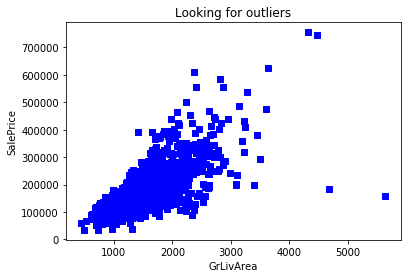

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(train.GrLivArea, train.SalePrice, c = "blue", marker = "s")
plt.title("Looking for outliers")
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")

In [0]:
train = train[train.GrLivArea < 4000]

# Log Transformation

We log transform the response variable to handle skewness in the response variable which can then be modeled better in linear models which like normal distributions since the variations will not be as extreme as skewed data. Thus this means that errors in predicting expensive houses and cheap houses will affect the result equally.

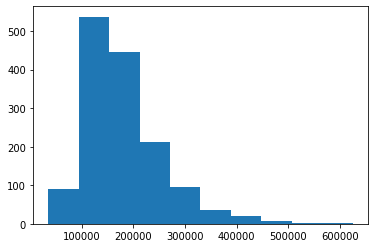

In [9]:
plt.hist(train.SalePrice);

In [0]:
train.SalePrice = np.log1p(train.SalePrice)
y = train.SalePrice

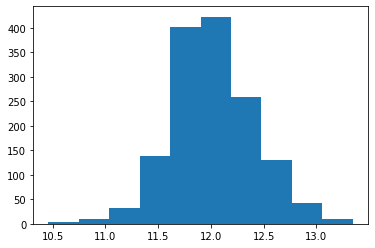

In [11]:
plt.hist(train.SalePrice);

# Handling Missing Values - Special Cases

In [0]:
# Alley : data description says NA means "no alley access"
train.loc[:, "Alley"] = train.loc[:, "Alley"].fillna("None")

# BedroomAbvGr : NA most likely means 0
train.loc[:, "BedroomAbvGr"] = train.loc[:, "BedroomAbvGr"].fillna(0)

# BsmtQual etc : data description says NA for basement features is "no basement"
train.loc[:, "BsmtQual"] = train.loc[:, "BsmtQual"].fillna("No")
train.loc[:, "BsmtCond"] = train.loc[:, "BsmtCond"].fillna("No")
train.loc[:, "BsmtExposure"] = train.loc[:, "BsmtExposure"].fillna("No")
train.loc[:, "BsmtFinType1"] = train.loc[:, "BsmtFinType1"].fillna("No")
train.loc[:, "BsmtFinType2"] = train.loc[:, "BsmtFinType2"].fillna("No")
train.loc[:, "BsmtFullBath"] = train.loc[:, "BsmtFullBath"].fillna(0)
train.loc[:, "BsmtHalfBath"] = train.loc[:, "BsmtHalfBath"].fillna(0)
train.loc[:, "BsmtUnfSF"] = train.loc[:, "BsmtUnfSF"].fillna(0)

# CentralAir : NA most likely means No
train.loc[:, "CentralAir"] = train.loc[:, "CentralAir"].fillna("N")

# Condition : NA most likely means Normal
train.loc[:, "Condition1"] = train.loc[:, "Condition1"].fillna("Norm")
train.loc[:, "Condition2"] = train.loc[:, "Condition2"].fillna("Norm")

# EnclosedPorch : NA most likely means no enclosed porch
train.loc[:, "EnclosedPorch"] = train.loc[:, "EnclosedPorch"].fillna(0)

# External stuff : NA most likely means average
train.loc[:, "ExterCond"] = train.loc[:, "ExterCond"].fillna("TA")
train.loc[:, "ExterQual"] = train.loc[:, "ExterQual"].fillna("TA")

# Fence : data description says NA means "no fence"
train.loc[:, "Fence"] = train.loc[:, "Fence"].fillna("No")

# FireplaceQu : data description says NA means "no fireplace"
train.loc[:, "FireplaceQu"] = train.loc[:, "FireplaceQu"].fillna("No")
train.loc[:, "Fireplaces"] = train.loc[:, "Fireplaces"].fillna(0)

# Functional : data description says NA means typical
train.loc[:, "Functional"] = train.loc[:, "Functional"].fillna("Typ")

# GarageType etc : data description says NA for garage features is "no garage"
train.loc[:, "GarageType"] = train.loc[:, "GarageType"].fillna("No")
train.loc[:, "GarageFinish"] = train.loc[:, "GarageFinish"].fillna("No")
train.loc[:, "GarageQual"] = train.loc[:, "GarageQual"].fillna("No")
train.loc[:, "GarageCond"] = train.loc[:, "GarageCond"].fillna("No")
train.loc[:, "GarageArea"] = train.loc[:, "GarageArea"].fillna(0)
train.loc[:, "GarageCars"] = train.loc[:, "GarageCars"].fillna(0)

# HalfBath : NA most likely means no half baths above grade
train.loc[:, "HalfBath"] = train.loc[:, "HalfBath"].fillna(0)

# HeatingQC : NA most likely means typical
train.loc[:, "HeatingQC"] = train.loc[:, "HeatingQC"].fillna("TA")

# KitchenAbvGr : NA most likely means 0
train.loc[:, "KitchenAbvGr"] = train.loc[:, "KitchenAbvGr"].fillna(0)

# KitchenQual : NA most likely means typical
train.loc[:, "KitchenQual"] = train.loc[:, "KitchenQual"].fillna("TA")

# LotFrontage : NA most likely means no lot frontage
train.loc[:, "LotFrontage"] = train.loc[:, "LotFrontage"].fillna(0)

# LotShape : NA most likely means regular
train.loc[:, "LotShape"] = train.loc[:, "LotShape"].fillna("Reg")

# MasVnrType : NA most likely means no veneer
train.loc[:, "MasVnrType"] = train.loc[:, "MasVnrType"].fillna("None")
train.loc[:, "MasVnrArea"] = train.loc[:, "MasVnrArea"].fillna(0)

# MiscFeature : data description says NA means "no misc feature"
train.loc[:, "MiscFeature"] = train.loc[:, "MiscFeature"].fillna("No")
train.loc[:, "MiscVal"] = train.loc[:, "MiscVal"].fillna(0)

# OpenPorchSF : NA most likely means no open porch
train.loc[:, "OpenPorchSF"] = train.loc[:, "OpenPorchSF"].fillna(0)

# PavedDrive : NA most likely means not paved
train.loc[:, "PavedDrive"] = train.loc[:, "PavedDrive"].fillna("N")

# PoolQC : data description says NA means "no pool"
train.loc[:, "PoolQC"] = train.loc[:, "PoolQC"].fillna("No")
train.loc[:, "PoolArea"] = train.loc[:, "PoolArea"].fillna(0)

# SaleCondition : NA most likely means normal sale
train.loc[:, "SaleCondition"] = train.loc[:, "SaleCondition"].fillna("Normal")

# ScreenPorch : NA most likely means no screen porch
train.loc[:, "ScreenPorch"] = train.loc[:, "ScreenPorch"].fillna(0)

# TotRmsAbvGrd : NA most likely means 0
train.loc[:, "TotRmsAbvGrd"] = train.loc[:, "TotRmsAbvGrd"].fillna(0)

# Utilities : NA most likely means all public utilities
train.loc[:, "Utilities"] = train.loc[:, "Utilities"].fillna("AllPub")

# WoodDeckSF : NA most likely means no wood deck
train.loc[:, "WoodDeckSF"] = train.loc[:, "WoodDeckSF"].fillna(0)

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1449 entries, 0 to 1459
Data columns (total 80 columns):
MSSubClass       1449 non-null int64
MSZoning         1449 non-null object
LotFrontage      1449 non-null float64
LotArea          1449 non-null int64
Street           1449 non-null object
Alley            1449 non-null object
LotShape         1449 non-null object
LandContour      1449 non-null object
Utilities        1449 non-null object
LotConfig        1449 non-null object
LandSlope        1449 non-null object
Neighborhood     1449 non-null object
Condition1       1449 non-null object
Condition2       1449 non-null object
BldgType         1449 non-null object
HouseStyle       1449 non-null object
OverallQual      1449 non-null int64
OverallCond      1449 non-null int64
YearBuilt        1449 non-null int64
YearRemodAdd     1449 non-null int64
RoofStyle        1449 non-null object
RoofMatl         1449 non-null object
Exterior1st      1449 non-null object
Exterior2nd      1449 no

# Simple Feature Engineering

In [0]:
# Some numerical features are actually really categories (assuming it is nominal)

train = train.replace({"MSSubClass" : {20 : "SC20", 30 : "SC30", 40 : "SC40", 45 : "SC45", 
                                       50 : "SC50", 60 : "SC60", 70 : "SC70", 75 : "SC75", 
                                       80 : "SC80", 85 : "SC85", 90 : "SC90", 120 : "SC120", 
                                       150 : "SC150", 160 : "SC160", 180 : "SC180", 190 : "SC190"},
                       "MoSold" : {1 : "Jan", 2 : "Feb", 3 : "Mar", 4 : "Apr", 5 : "May", 6 : "Jun",
                                   7 : "Jul", 8 : "Aug", 9 : "Sep", 10 : "Oct", 11 : "Nov", 12 : "Dec"}
                      })

In [0]:
# Encode some categorical features as ordinal when there is information in the order

train = train.replace({"Alley" : {"Grvl" : 1, "Pave" : 2},
                       "BsmtCond" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "BsmtExposure" : {"No" : 0, "Mn" : 1, "Av": 2, "Gd" : 3},
                       "BsmtFinType1" : {"No" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, 
                                         "ALQ" : 5, "GLQ" : 6},
                       "BsmtFinType2" : {"No" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, 
                                         "ALQ" : 5, "GLQ" : 6},
                       "BsmtQual" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA": 3, "Gd" : 4, "Ex" : 5},
                       "ExterCond" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                       "ExterQual" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                       "FireplaceQu" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "Functional" : {"Sal" : 1, "Sev" : 2, "Maj2" : 3, "Maj1" : 4, "Mod": 5, 
                                       "Min2" : 6, "Min1" : 7, "Typ" : 8},
                       "GarageCond" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "GarageQual" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "HeatingQC" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "KitchenQual" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "LandSlope" : {"Sev" : 1, "Mod" : 2, "Gtl" : 3},
                       "LotShape" : {"IR3" : 1, "IR2" : 2, "IR1" : 3, "Reg" : 4},
                       "PavedDrive" : {"N" : 0, "P" : 1, "Y" : 2},
                       "PoolQC" : {"No" : 0, "Fa" : 1, "TA" : 2, "Gd" : 3, "Ex" : 4},
                       "Street" : {"Grvl" : 1, "Pave" : 2},
                       "Utilities" : {"ELO" : 1, "NoSeWa" : 2, "NoSewr" : 3, "AllPub" : 4}}
                     )

# Advanced Feature Engineering

## Simplifying Existing Features

In [0]:
train["SimplOverallQual"] = train.OverallQual.replace({1 : 1, 2 : 1, 3 : 1, # bad
                                                       4 : 2, 5 : 2, 6 : 2, # average
                                                       7 : 3, 8 : 3, 9 : 3, 10 : 3 # good
                                                      })

train["SimplOverallCond"] = train.OverallCond.replace({1 : 1, 2 : 1, 3 : 1, # bad
                                                       4 : 2, 5 : 2, 6 : 2, # average
                                                       7 : 3, 8 : 3, 9 : 3, 10 : 3 # good
                                                      })

train["SimplPoolQC"] = train.PoolQC.replace({1 : 1, 2 : 1, # average
                                             3 : 2, 4 : 2 # good
                                            })

train["SimplGarageCond"] = train.GarageCond.replace({1 : 1, # bad
                                                     2 : 1, 3 : 1, # average
                                                     4 : 2, 5 : 2 # good
                                                    })

train["SimplGarageQual"] = train.GarageQual.replace({1 : 1, # bad
                                                     2 : 1, 3 : 1, # average
                                                     4 : 2, 5 : 2 # good
                                                    })

train["SimplFireplaceQu"] = train.FireplaceQu.replace({1 : 1, # bad
                                                       2 : 1, 3 : 1, # average
                                                       4 : 2, 5 : 2 # good
                                                      })

train["SimplFireplaceQu"] = train.FireplaceQu.replace({1 : 1, # bad
                                                       2 : 1, 3 : 1, # average
                                                       4 : 2, 5 : 2 # good
                                                      })

train["SimplFunctional"] = train.Functional.replace({1 : 1, 2 : 1, # bad
                                                     3 : 2, 4 : 2, # major
                                                     5 : 3, 6 : 3, 7 : 3, # minor
                                                     8 : 4 # typical
                                                    })

train["SimplKitchenQual"] = train.KitchenQual.replace({1 : 1, # bad
                                                       2 : 1, 3 : 1, # average
                                                       4 : 2, 5 : 2 # good
                                                      })

train["SimplHeatingQC"] = train.HeatingQC.replace({1 : 1, # bad
                                                   2 : 1, 3 : 1, # average
                                                   4 : 2, 5 : 2 # good
                                                  })

train["SimplBsmtFinType1"] = train.BsmtFinType1.replace({1 : 1, # unfinished
                                                         2 : 1, 3 : 1, # rec room
                                                         4 : 2, 5 : 2, 6 : 2 # living quarters
                                                        })

train["SimplBsmtFinType2"] = train.BsmtFinType2.replace({1 : 1, # unfinished
                                                         2 : 1, 3 : 1, # rec room
                                                         4 : 2, 5 : 2, 6 : 2 # living quarters
                                                        })

train["SimplBsmtCond"] = train.BsmtCond.replace({1 : 1, # bad
                                                 2 : 1, 3 : 1, # average
                                                 4 : 2, 5 : 2 # good
                                                })

train["SimplBsmtQual"] = train.BsmtQual.replace({1 : 1, # bad
                                                 2 : 1, 3 : 1, # average
                                                 4 : 2, 5 : 2 # good
                                                })

train["SimplExterCond"] = train.ExterCond.replace({1 : 1, # bad
                                                   2 : 1, 3 : 1, # average
                                                   4 : 2, 5 : 2 # good
                                                  })

train["SimplExterQual"] = train.ExterQual.replace({1 : 1, # bad
                                                   2 : 1, 3 : 1, # average
                                                   4 : 2, 5 : 2 # good
                                                  })

## New Features based on Feature Crosses \ Interactions

In [0]:
# Overall quality of the house
train["OverallGrade"] = train["OverallQual"] * train["OverallCond"]

# Overall quality of the garage
train["GarageGrade"] = train["GarageQual"] * train["GarageCond"]

# Overall quality of the exterior
train["ExterGrade"] = train["ExterQual"] * train["ExterCond"]

# Overall kitchen score
train["KitchenScore"] = train["KitchenAbvGr"] * train["KitchenQual"]

# Overall fireplace score
train["FireplaceScore"] = train["Fireplaces"] * train["FireplaceQu"]

# Overall garage score
train["GarageScore"] = train["GarageArea"] * train["GarageQual"]

# Overall pool score
train["PoolScore"] = train["PoolArea"] * train["PoolQC"]

# Simplified overall quality of the house
train["SimplOverallGrade"] = train["SimplOverallQual"] * train["SimplOverallCond"]

# Simplified overall quality of the exterior
train["SimplExterGrade"] = train["SimplExterQual"] * train["SimplExterCond"]

# Simplified overall pool score
train["SimplPoolScore"] = train["PoolArea"] * train["SimplPoolQC"]

# Simplified overall garage score
train["SimplGarageScore"] = train["GarageArea"] * train["SimplGarageQual"]

# Simplified overall fireplace score
train["SimplFireplaceScore"] = train["Fireplaces"] * train["SimplFireplaceQu"]

# Simplified overall kitchen score
train["SimplKitchenScore"] = train["KitchenAbvGr"] * train["SimplKitchenQual"]

# Total number of bathrooms
train["TotalBath"] = train["BsmtFullBath"] + (0.5 * train["BsmtHalfBath"]) + \
train["FullBath"] + (0.5 * train["HalfBath"])

# Total SF for house (incl. basement)
train["AllSF"] = train["GrLivArea"] + train["TotalBsmtSF"]

# Total SF for 1st + 2nd floors
train["AllFlrsSF"] = train["1stFlrSF"] + train["2ndFlrSF"]

# Total SF for porch
train["AllPorchSF"] = train["OpenPorchSF"] + train["EnclosedPorch"] + \
train["3SsnPorch"] + train["ScreenPorch"]

# Has masonry veneer or not
train["HasMasVnr"] = train.MasVnrType.replace({"BrkCmn" : 1, "BrkFace" : 1, "CBlock" : 1, 
                                               "Stone" : 1, "None" : 0})

# House completed before sale or not
train["BoughtOffPlan"] = train.SaleCondition.replace({"Abnorml" : 0, "Alloca" : 0, "AdjLand" : 0, 
                                                      "Family" : 0, "Normal" : 0, "Partial" : 1})

## Polynomial Features on Important Features

In [18]:
print("Find most important features relative to SalePrice")
corr = train.corr()
corr.sort_values(["SalePrice"], ascending = False, inplace = True)
print(corr.SalePrice[:11])

Find most important features relative to SalePrice
SalePrice           1.000000
OverallQual         0.816535
AllSF               0.814009
AllFlrsSF           0.729217
GrLivArea           0.718465
SimplOverallQual    0.706771
ExterQual           0.677543
GarageCars          0.674370
TotalBath           0.673602
KitchenQual         0.662787
GarageScore         0.650761
Name: SalePrice, dtype: float64


In [0]:
train["OverallQual-s2"] = train["OverallQual"] ** 2
train["OverallQual-s3"] = train["OverallQual"] ** 3
train["OverallQual-Sq"] = np.sqrt(train["OverallQual"])
train["AllSF-2"] = train["AllSF"] ** 2
train["AllSF-3"] = train["AllSF"] ** 3
train["AllSF-Sq"] = np.sqrt(train["AllSF"])
train["AllFlrsSF-2"] = train["AllFlrsSF"] ** 2
train["AllFlrsSF-3"] = train["AllFlrsSF"] ** 3
train["AllFlrsSF-Sq"] = np.sqrt(train["AllFlrsSF"])
train["GrLivArea-2"] = train["GrLivArea"] ** 2
train["GrLivArea-3"] = train["GrLivArea"] ** 3
train["GrLivArea-Sq"] = np.sqrt(train["GrLivArea"])
train["SimplOverallQual-s2"] = train["SimplOverallQual"] ** 2
train["SimplOverallQual-s3"] = train["SimplOverallQual"] ** 3
train["SimplOverallQual-Sq"] = np.sqrt(train["SimplOverallQual"])
train["ExterQual-2"] = train["ExterQual"] ** 2
train["ExterQual-3"] = train["ExterQual"] ** 3
train["ExterQual-Sq"] = np.sqrt(train["ExterQual"])
train["GarageCars-2"] = train["GarageCars"] ** 2
train["GarageCars-3"] = train["GarageCars"] ** 3
train["GarageCars-Sq"] = np.sqrt(train["GarageCars"])
train["TotalBath-2"] = train["TotalBath"] ** 2
train["TotalBath-3"] = train["TotalBath"] ** 3
train["TotalBath-Sq"] = np.sqrt(train["TotalBath"])
train["KitchenQual-2"] = train["KitchenQual"] ** 2
train["KitchenQual-3"] = train["KitchenQual"] ** 3
train["KitchenQual-Sq"] = np.sqrt(train["KitchenQual"])
train["GarageScore-2"] = train["GarageScore"] ** 2
train["GarageScore-3"] = train["GarageScore"] ** 3
train["GarageScore-Sq"] = np.sqrt(train["GarageScore"])

# Missing Value Imputation 

In [20]:
train.isnull().sum().sort_values(ascending=False)

GarageYrBlt       74
Electrical         1
GarageScore-Sq     0
GrLivArea          0
BedroomAbvGr       0
                  ..
OverallGrade       0
SimplExterQual     0
SimplExterCond     0
SimplBsmtQual      0
MSSubClass         0
Length: 144, dtype: int64

In [0]:
train['Electrical'] = train['Electrical'].fillna(train['Electrical'].mode())

In [0]:
train['GarageYrBlt'] = train['GarageYrBlt'].fillna(train['GarageYrBlt'].median())

# One-hot encoding Categoricals

In [0]:
train = pd.get_dummies(train)

# Preparing Data for Modeling

In [24]:
print("New number of features : " + str(train.shape[1]))

New number of features : 323


In [25]:
train.dtypes[train.dtypes == 'float64'].index.tolist()

['LotFrontage',
 'MasVnrArea',
 'GarageYrBlt',
 'SalePrice',
 'TotalBath',
 'OverallQual-Sq',
 'AllSF-Sq',
 'AllFlrsSF-Sq',
 'GrLivArea-Sq',
 'SimplOverallQual-Sq',
 'ExterQual-Sq',
 'GarageCars-Sq',
 'TotalBath-2',
 'TotalBath-3',
 'TotalBath-Sq',
 'KitchenQual-Sq',
 'GarageScore-Sq']

In [26]:
train[train.dtypes[train.dtypes == 'int64'].index.tolist()].head()

,LotArea,Street,LotShape,Utilities,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,ExterQual,ExterCond,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,...,SimplBsmtCond,SimplBsmtQual,SimplExterCond,SimplExterQual,OverallGrade,GarageGrade,ExterGrade,KitchenScore,FireplaceScore,GarageScore,PoolScore,SimplOverallGrade,SimplExterGrade,SimplPoolScore,SimplGarageScore,SimplFireplaceScore,SimplKitchenScore,AllSF,AllFlrsSF,AllPorchSF,HasMasVnr,BoughtOffPlan,OverallQual-s2,OverallQual-s3,AllSF-2,AllSF-3,AllFlrsSF-2,AllFlrsSF-3,GrLivArea-2,GrLivArea-3,SimplOverallQual-s2,SimplOverallQual-s3,ExterQual-2,ExterQual-3,GarageCars-2,GarageCars-3,KitchenQual-2,KitchenQual-3,GarageScore-2,GarageScore-3
0,8450,2,4,4,3,7,5,2003,2003,4,3,4,0,6,706,1,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,8,0,0,2,548,3,3,2,...,1,2,1,2,35,9,12,4,0,1644,0,6,2,0,548,0,2,2566,1710,61,1,0,49,343,6584356,16895457496,2924100,5000211000,2924100,5000211000,9,27,16,64,4,8,16,64,2702736,4443297984
1,9600,2,4,4,3,6,8,1976,1976,3,3,4,3,5,978,1,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,8,1,3,2,460,3,3,2,...,1,2,1,1,48,9,9,3,3,1380,0,6,1,0,460,1,1,2524,1262,0,0,0,36,216,6370576,16079333824,1592644,2009916728,1592644,2009916728,4,8,9,27,4,8,9,27,1904400,2628072000
2,11250,2,3,4,3,7,5,2001,2002,4,3,4,1,6,486,1,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,8,1,3,2,608,3,3,2,...,1,2,1,2,35,9,12,4,3,1824,0,6,2,0,608,1,2,2706,1786,42,1,0,49,343,7322436,19814511816,3189796,5696975656,3189796,5696975656,9,27,16,64,4,8,16,64,3326976,6068404224
3,9550,2,3,4,3,7,5,1915,1970,3,3,3,0,5,216,1,0,540,756,4,961,756,0,1717,1,0,1,0,3,1,4,7,8,1,4,3,642,3,3,2,...,2,1,1,1,35,9,9,4,4,1926,0,6,1,0,642,2,2,2473,1717,307,0,0,49,343,6115729,15124197817,2948089,5061868813,2948089,5061868813,9,27,9,27,9,27,16,64,3709476,7144450776
4,14260,2,3,4,3,8,5,2000,2000,4,3,4,2,6,655,1,0,490,1145,5,1145,1053,0,2198,1,0,2,1,4,1,4,9,8,1,3,3,836,3,3,2,...,1,2,1,2,40,9,12,4,3,2508,0,6,2,0,836,1,2,3343,2198,84,1,0,64,512,11175649,37360194607,4831204,10618986392,4831204,10618986392,9,27,16,64,9,27,16,64,6290064,15775480512


In [0]:
y = train['SalePrice']
train = train.drop(columns=["SalePrice"])

In [0]:
num_cols = list(set(["LotArea", "YearBuilt", "YearRemodAdd", "BsmtFinSF1", "BsmtUnfSF", "TotalBsmtSF", "1stFlrSF", 
            "2ndFlrSF", "GrLivArea", "GarageArea", "OverallGrade", "OverallQual-s2", "OverallQual-s3", 
            "OverallQual-Sq", "AllSF-2", "AllSF-3", "AllSF-Sq", 
            "AllFlrsSF-2", "AllFlrsSF-3", "AllFlrsSF-Sq", "GrLivArea-2", "GrLivArea-3", 
            "GrLivArea-Sq", "SimplOverallQual-s2", "SimplOverallQual-s3", "SimplOverallQual-Sq", 
            "ExterQual-2", "ExterQual-3",  "ExterQual-Sq", "GarageCars-2", "GarageCars-3", 
            "GarageCars-Sq", "TotalBath-2",  "TotalBath-3", "TotalBath-Sq", "KitchenQual-2", 
            "KitchenQual-3", "KitchenQual-Sq", "GarageScore-2", "GarageScore-3", "GarageScore-Sq",
            'LotFrontage', 'MasVnrArea', 'GarageYrBlt', 'TotalBath', 'OverallQual-Sq',
            'AllSF-Sq', 'AllFlrsSF-Sq', 'GrLivArea-Sq', 'SimplOverallQual-Sq', 'ExterQual-Sq', 'GarageCars-Sq',
            'TotalBath-2', 'TotalBath-3', 'TotalBath-Sq', 'KitchenQual-Sq', 'GarageScore-Sq']))



categorical_cols = list(set(train.columns) - set(num_cols))
train_num = train[num_cols]
train_cat = train[categorical_cols]

In [29]:
from sklearn.model_selection import train_test_split

train_dataset = pd.concat([train_num, train_cat], axis=1)
# Partition the dataset in train + validation sets
X_train, X_test, y_train, y_test = train_test_split(train_dataset, y, test_size = 0.3, random_state=0)

print("X_train : " + str(X_train.shape))
print("X_test : " + str(X_test.shape))
print("y_train : " + str(y_train.shape))
print("y_test : " + str(y_test.shape))

X_train : (1014, 322)
X_test : (435, 322)
y_train : (1014,)
y_test : (435,)


# Feature Scaling \ Normalization

In [30]:
from sklearn.preprocessing import StandardScaler

# Standardize numerical features
ss = StandardScaler()
X_train.loc[:, num_cols] = ss.fit_transform(X_train.loc[:, num_cols])
X_test.loc[:, num_cols] = ss.transform(X_test.loc[:, num_cols])

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [31]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

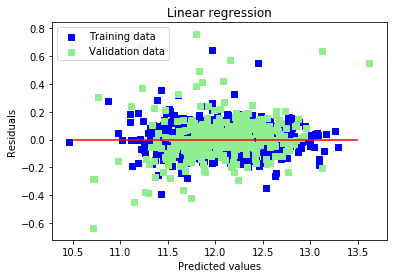

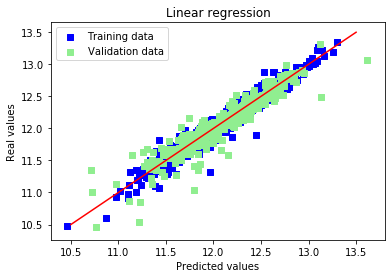

In [33]:
# Plot residuals
plt.scatter(y_train_pred, y_train_pred - y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_pred, y_test_pred - y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()

# Plot predictions
plt.scatter(y_train_pred, y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_pred, y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")

In [34]:
from sklearn.model_selection import cross_val_score

cross_val_score(lr, X_train, y_train, cv=5)

array([0.6242811 , 0.85894616, 0.78668463, 0.84623678, 0.86308135])

In [35]:
cross_val_score(lr, X_test, y_test, cv=5)

array([-0.14885453, -0.75966885,  0.44725606,  0.68032305,  0.64614351])

Model has captured a lot of the variance but there is a high level of overfitting which was our initial problem also when we first introduced regression.

In [36]:
from sklearn.metrics import mean_squared_error, r2_score

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print('R-sq:', r2_score(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

y_test_exp = np.expm1(y_test)
y_pred_exp = np.expm1(y_pred)
print('-'*50)
print('R-sq orig price:', r2_score(y_test_exp, y_pred_exp))
print('MSE orig price:', mean_squared_error(y_test_exp, y_pred_exp))
print('RMSE orig price:', np.sqrt(mean_squared_error(y_test_exp, y_pred_exp)))

R-sq: 0.8768277932546962
MSE: 0.018916019538561885
RMSE: 0.1375355210066181
--------------------------------------------------
R-sq orig price: 0.8472415239046395
MSE orig price: 837172927.9391828
RMSE orig price: 28933.940760621994


# Linear Regression with Ridge regularization (L2 penalty)

Regularization is a very useful method to handle collinearity, filter out noise from data, and eventually prevent overfitting. The concept behind regularization is to introduce additional information (bias) to penalize extreme parameter weights.

Ridge regression is an L2 penalized model where we simply add the squared sum of the weights to our cost function.

In [37]:
from sklearn.linear_model import RidgeCV, Ridge

ridge = RidgeCV(alphas = [0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6, 10, 30, 60])
ridge.fit(X_train, y_train)
alpha = ridge.alpha_
print("Best alpha :", alpha)

Best alpha : 30.0


In [38]:
ridge = Ridge(alpha=1)
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)
print('R-sq:', r2_score(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

y_test_exp = np.expm1(y_test)
y_pred_exp = np.expm1(y_pred)
print('-'*50)
print('R-sq orig price:', r2_score(y_test_exp, y_pred_exp))
print('MSE orig price:', mean_squared_error(y_test_exp, y_pred_exp))
print('RMSE orig price:', np.sqrt(mean_squared_error(y_test_exp, y_pred_exp)))

R-sq: 0.910354063295234
MSE: 0.013767264020579772
RMSE: 0.11733398493437343
--------------------------------------------------
R-sq orig price: 0.9177130797760126
MSE orig price: 450962746.5254985
RMSE orig price: 21235.883464680683


In [39]:
ridge = Ridge(alpha=30)
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)
print('R-sq:', r2_score(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

y_test_exp = np.expm1(y_test)
y_pred_exp = np.expm1(y_pred)
print('-'*50)
print('R-sq orig price:', r2_score(y_test_exp, y_pred_exp))
print('MSE orig price:', mean_squared_error(y_test_exp, y_pred_exp))
print('RMSE orig price:', np.sqrt(mean_squared_error(y_test_exp, y_pred_exp)))

R-sq: 0.9113756953372514
MSE: 0.013610368141398347
RMSE: 0.11666348246730143
--------------------------------------------------
R-sq orig price: 0.9250327550206336
MSE orig price: 410848219.90323734
RMSE orig price: 20269.391207020435


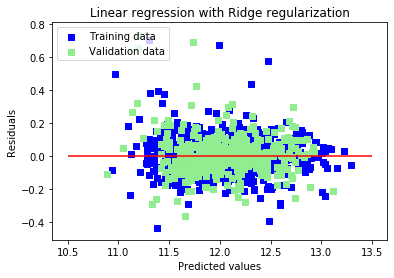

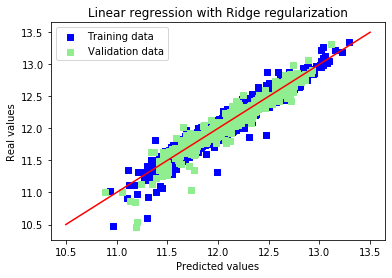

Ridge picked 315 features and eliminated the other 7 features


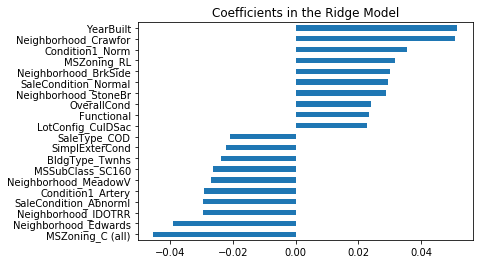

In [40]:
y_train_rdg = ridge.predict(X_train)
y_test_rdg = ridge.predict(X_test)

# Plot residuals
plt.scatter(y_train_rdg, y_train_rdg - y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_rdg, y_test_rdg - y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression with Ridge regularization")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()

# Plot predictions
plt.scatter(y_train_rdg, y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_rdg, y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression with Ridge regularization")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
plt.show()

# Plot important coefficients
coefs = pd.Series(ridge.coef_, index = X_train.columns)
print("Ridge picked " + str(sum(coefs != 0)) + " features and eliminated the other " +  \
      str(sum(coefs == 0)) + " features")
imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh")
plt.title("Coefficients in the Ridge Model");

In [41]:
cross_val_score(ridge, X_train, y_train, cv=5)

array([0.92094828, 0.93926255, 0.90745755, 0.88560785, 0.9140626 ])

In [42]:
cross_val_score(ridge, X_test, y_test, cv=5)

array([0.78826782, 0.90087141, 0.90673747, 0.88087931, 0.90603319])

We're getting a much better RMSE result now that we've added regularization. The very small difference between training and test results indicate that we eliminated most of the overfitting. Visually, the graphs seem to confirm that idea. Ridge used almost all of the existing features which is expected.

# Linear Regression with Lasso regularization (L1 penalty)

LASSO stands for Least Absolute Shrinkage and Selection Operator. It is an alternative regularization method, where we simply replace the square of the weights by the sum of the absolute value of the weights. 

In contrast to L2 regularization, L1 regularization yields sparse feature vectors : many feature weights will be zero. Sparsity can be useful in practice if we have a high dimensional dataset with many features that are irrelevant.

In [43]:
from sklearn.linear_model import LassoCV, Lasso

lasso = LassoCV(alphas = [0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1, 
                          0.3, 0.6, 1], 
                max_iter = 50000, cv = 10)
lasso.fit(X_train, y_train)
alpha = lasso.alpha_
print("Best alpha :", alpha)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.1569749221673007, tolerance: 0.01400971609556408
  tol, rng, random, positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.160510770766596, tolerance: 0.014328376141773047
  tol, rng, random, positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.0492909302707982, tolerance: 0.013744067300837813
  tol, rng, random, positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to 

Best alpha : 0.0006


In [44]:
lasso = Lasso(alpha=1)
lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_test)
print('R-sq:', r2_score(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

y_test_exp = np.expm1(y_test)
y_pred_exp = np.expm1(y_pred)
print('-'*50)
print('R-sq orig price:', r2_score(y_test_exp, y_pred_exp))
print('MSE orig price:', mean_squared_error(y_test_exp, y_pred_exp))
print('RMSE orig price:', np.sqrt(mean_squared_error(y_test_exp, y_pred_exp)))

R-sq: 0.7299408505629275
MSE: 0.04147400036342885
RMSE: 0.2036516642785638
--------------------------------------------------
R-sq orig price: 0.7198992326835377
MSE orig price: 1535055765.7170572
RMSE orig price: 39179.78771914235


In [45]:
lasso = Lasso(alpha=0.0006)
lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_test)
print('R-sq:', r2_score(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

y_test_exp = np.expm1(y_test)
y_pred_exp = np.expm1(y_pred)
print('-'*50)
print('R-sq orig price:', r2_score(y_test_exp, y_pred_exp))
print('MSE orig price:', mean_squared_error(y_test_exp, y_pred_exp))
print('RMSE orig price:', np.sqrt(mean_squared_error(y_test_exp, y_pred_exp)))

R-sq: 0.918592866237273
MSE: 0.012502000033321447
RMSE: 0.11181234293816335
--------------------------------------------------
R-sq orig price: 0.9280775865770373
MSE orig price: 394161417.2176386
RMSE orig price: 19853.49886588353


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.699438594884936, tolerance: 0.015616150537481426
  positive)


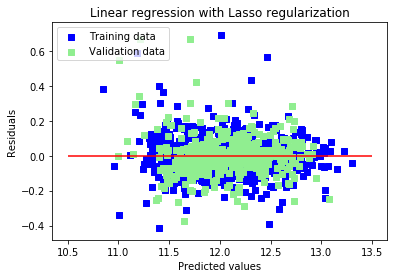

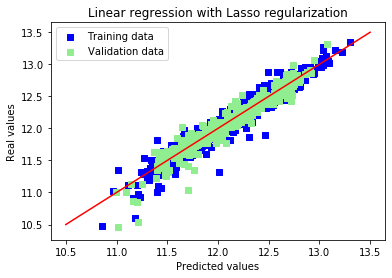

Lasso picked 112 features and eliminated the other 210 features


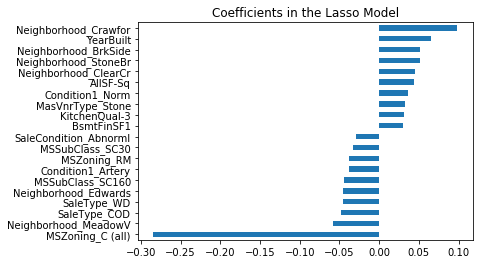

In [46]:
y_train_las = lasso.predict(X_train)
y_test_las = lasso.predict(X_test)

# Plot residuals
plt.scatter(y_train_las, y_train_las - y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_las, y_test_las - y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression with Lasso regularization")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()

# Plot predictions
plt.scatter(y_train_las, y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_las, y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression with Lasso regularization")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
plt.show()

# Plot important coefficients
coefs = pd.Series(lasso.coef_, index = X_train.columns)
print("Lasso picked " + str(sum(coefs != 0)) + " features and eliminated the other " +  \
      str(sum(coefs == 0)) + " features")
imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model");

In [47]:
cross_val_score(lasso, X_train, y_train, cv=5)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.459803322965255, tolerance: 0.012120176375661651
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.6383160203239395, tolerance: 0.012459287602720075
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.5831592414321, tolerance: 0.013171521951589086
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.857446

array([0.92454021, 0.93973287, 0.9062136 , 0.88692856, 0.92223605])

In [48]:
cross_val_score(lasso, X_test, y_test, cv=5)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.5275431119209424, tolerance: 0.005812099693657607
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.4221924225831746, tolerance: 0.0053770547754974805
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.4829808874038792, tolerance: 0.005519887200077742
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.1

array([0.83135755, 0.89871181, 0.89321133, 0.84131664, 0.90330339])

The most interesting thing is that Lasso used only one third of the available features. Another interesting tidbit : it seems to give big weights to Neighborhood categories, both in positive and negative ways. Intuitively it makes sense, house prices change a whole lot from one neighborhood to another in the same city.

# Linear Regression with ElasticNet regularization (L1 and L2 penalty)

ElasticNet is a compromise between Ridge and Lasso regression. It has a L1 penalty to generate sparsity and a L2 penalty to overcome some of the limitations of Lasso, such as the number of variables 

In [49]:
from sklearn.linear_model import ElasticNetCV, ElasticNet

elasticNet = ElasticNetCV(l1_ratio = [0.1, 0.3, 0.5, 0.6, 0.7, 0.8, 0.85, 0.9, 0.95, 1],
                          alphas = [0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 
                                    0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6], 
                          max_iter = 50000, cv = 10)
elasticNet.fit(X_train, y_train)
alpha = elasticNet.alpha_
ratio = elasticNet.l1_ratio_
print("Best l1_ratio :", ratio)
print("Best alpha :", alpha )

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.024949373577815237, tolerance: 0.01400971609556408
  tol, rng, random, positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.891302357516063, tolerance: 0.01400971609556408
  tol, rng, random, positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.642874880131261, tolerance: 0.013724210987397482
  tol, rng, random, positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to 

Best l1_ratio : 0.9
Best alpha : 0.0006


In [50]:
enet = ElasticNet(alpha=1, l1_ratio=0.5)
enet.fit(X_train, y_train)
y_pred = enet.predict(X_test)
print('R-sq:', r2_score(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

y_test_exp = np.expm1(y_test)
y_pred_exp = np.expm1(y_pred)
print('-'*50)
print('R-sq orig price:', r2_score(y_test_exp, y_pred_exp))
print('MSE orig price:', mean_squared_error(y_test_exp, y_pred_exp))
print('RMSE orig price:', np.sqrt(mean_squared_error(y_test_exp, y_pred_exp)))

R-sq: 0.730877017130152
MSE: 0.04133022973899259
RMSE: 0.2032983761346671
--------------------------------------------------
R-sq orig price: 0.7191871384094042
MSE orig price: 1538958305.6198049
RMSE orig price: 39229.55908010954


In [51]:
enet = ElasticNet(alpha=0.001, l1_ratio=0.5)
enet.fit(X_train, y_train)
y_pred = enet.predict(X_test)
print('R-sq:', r2_score(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

y_test_exp = np.expm1(y_test)
y_pred_exp = np.expm1(y_pred)
print('-'*50)
print('R-sq orig price:', r2_score(y_test_exp, y_pred_exp))
print('MSE orig price:', mean_squared_error(y_test_exp, y_pred_exp))
print('RMSE orig price:', np.sqrt(mean_squared_error(y_test_exp, y_pred_exp)))

R-sq: 0.9189061616886016
MSE: 0.012453886071289985
RMSE: 0.11159698056529122
--------------------------------------------------
R-sq orig price: 0.9286474567861638
MSE orig price: 391038317.77520937
RMSE orig price: 19774.688816140933


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.564790958851228, tolerance: 0.015616150537481426
  positive)


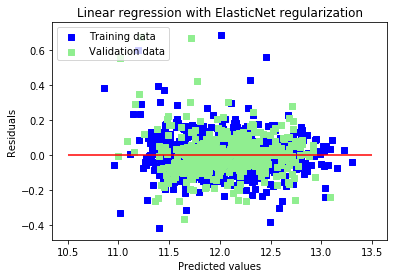

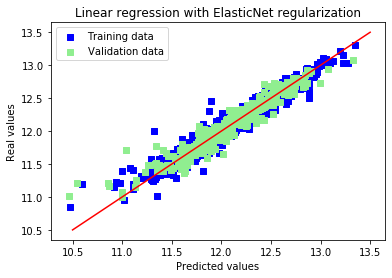

ElasticNet picked 114 features and eliminated the other 208 features


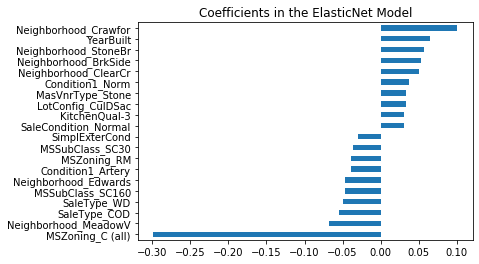

In [52]:
y_train_ela = enet.predict(X_train)
y_test_ela = enet.predict(X_test)

# Plot residuals
plt.scatter(y_train_ela, y_train_ela - y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_ela, y_test_ela - y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression with ElasticNet regularization")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()

# Plot predictions
plt.scatter(y_train, y_train_ela, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test, y_test_ela, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression with ElasticNet regularization")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
plt.show()

# Plot important coefficients
coefs = pd.Series(elasticNet.coef_, index = X_train.columns)
print("ElasticNet picked " + str(sum(coefs != 0)) + " features and eliminated the other " +  str(sum(coefs == 0)) + " features")
imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh")
plt.title("Coefficients in the ElasticNet Model");

In [53]:
cross_val_score(enet, X_train, y_train, cv=5)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.309312158445939, tolerance: 0.012120176375661651
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.541313098012345, tolerance: 0.012459287602720075
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.4508487961220995, tolerance: 0.013171521951589086
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.9769

array([0.92428028, 0.93991022, 0.90399411, 0.88620668, 0.92310103])

In [54]:
cross_val_score(enet, X_test, y_test, cv=5)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.4923023062616496, tolerance: 0.005812099693657607
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.377186613212983, tolerance: 0.0053770547754974805
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.4495500808709914, tolerance: 0.005519887200077742
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.24

array([0.80041214, 0.89524528, 0.88985045, 0.84125482, 0.89971896])

The optimal L1 ratio used by ElasticNet here is equal to 0.5 and for L2 is 0.001 which shows it uses a combination of both methods and gives us the best performance so far! Results are however very similar to the Lasso model